## ALGORITMO NAIVE-BAYES MULTINOMIAL - DETECCIÓN DE SPAM

Importamos librerías necesarias.  
Cargamos dataset usando un URL y a través de un REQUESTS

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Preparación del dataset

In [9]:
# Cargamos dataset
sms_data = pd.read_csv("./datasets/archive/spam.csv", encoding='latin-1') 

# Preprocesado de datos
sms_data = sms_data[['v1', 'v2']]
sms_data = sms_data.rename(columns={'v1': 'label', 'v2': 'text'})

# Separación de características y etiqueta
X = sms_data['text']
y = sms_data['label']

## Generación del conjunto de TRAIN y de TEST

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## E.D.A.

Distribución de clases

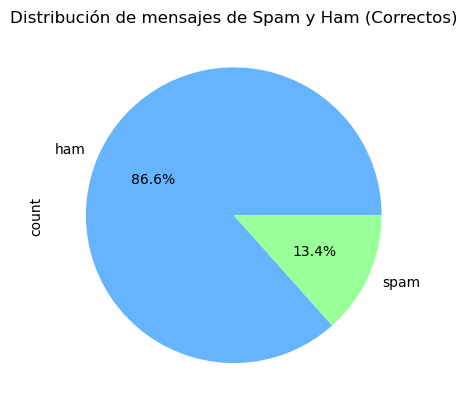

In [11]:
# Distribución de clases
class_distribution = sms_data['label'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Distribución de mensajes de Spam y Ham (Correctos)')
plt.show()

## Generación de nube de palabras.

As our dataset contains text dataset so that generating word clouds for relevant words in spam and ham messages provides a visual representation of the most common and relevant terms.

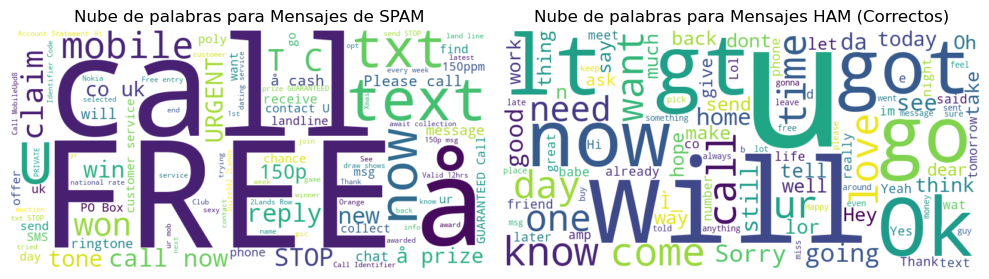

In [12]:
# Generación de la nube de palabras para mensajes de SPAM
spam_text = ' '.join(sms_data[sms_data['label'] == 'spam']['text'])
spam_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(spam_text)

# Generación de la nube de palabras para mensajes HAM (Correctos)
ham_text = ' '.join(sms_data[sms_data['label'] == 'ham']['text'])
ham_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', random_state=42).generate(ham_text)

# Ploteado de ambas nubes
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Nube de palabras para Mensajes de SPAM')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Nube de palabras para Mensajes HAM (Correctos)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Construcción y entrenamiento del modelo

Antes de entrenar los modelos necesitamos vectorizar los datos de texto para convertirlos en datos numéricos. Para ello utilizaremos Count Vectorizer. Después entrenaremos el NB Multinomial y el NB Gaussiano para mostrar el rendimiento comparativo. Tenemos que especificar algunos de los hiperparámetros de MNB que se discuten a continuación:

- alfa: Es el parámetro de suavizado de Laplace que se utiliza para evitar probabilidades cero en los casos en que una característica no se produce en una clase particular en los datos de entrenamiento. Un valor más alto de alpha resulta en un suavizado menos agresivo que permite que el modelo sea más sensible a los datos de entrenamiento.
- fit_prior: Es un parámetro booleano (Verdadero/Falso) que determina si se aprenden o no las probabilidades previas de clase. Lo pondremos a 'True' para que asuma probabilidades previas uniformes para las clases.
- force_alpha: También es un parámetro booleano (Verdadero/Falso) que obliga a añadir el alfa a los recuentos de muestras y a suavizarlos si se establece en 'Verdadero'.

In [13]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
mnb.fit(X_train_vec, y_train)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_vec.toarray(), y_train)


GaussianNB()

## Evaluación de los modelos
Evaluamos el rendimiento de ambos modelos en términos de precisión y puntuación F1.

In [14]:
# Evaluate the models using accuracy and F1-score
y_pred_mnb = mnb.predict(X_test_vec)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, pos_label='spam')

y_pred_gnb = gnb.predict(X_test_vec.toarray())
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='spam')

# Print the results
print("Multinomial Naive Bayes - Accuracy:", accuracy_mnb)
print("Multinomial Naive Bayes - F1-score for 'spam' class:", f1_mnb)

print("Gaussian Naive Bayes - Accuracy:", accuracy_gnb)
print("Gaussian Naive Bayes - F1-score for 'spam' class:", f1_gnb)


Multinomial Naive Bayes - Accuracy: 0.9838565022421525
Multinomial Naive Bayes - F1-score for 'spam' class: 0.9370629370629371
Gaussian Naive Bayes - Accuracy: 0.9004484304932735
Gaussian Naive Bayes - F1-score for 'spam' class: 0.7131782945736436


## Comparativa gráfica
Ahora vamos a representar gráficamente estos resultados para ver una comparación gráfica del rendimiento de ambos modelos. A partir del gráfico, podemos decir que el MNB tiene un rendimiento mucho mejor que el GNB cuando se trata de datos de texto.

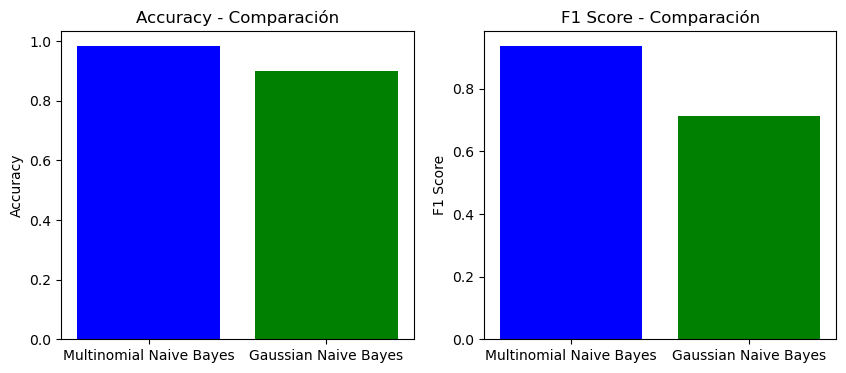

In [15]:
methods = ['Multinomial Naive Bayes', 'Gaussian Naive Bayes']
accuracy_scores = [accuracy_mnb, accuracy_gnb]
f1_scores = [f1_mnb, f1_gnb]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(methods, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy - Comparación')

plt.subplot(1, 2, 2)
plt.bar(methods, f1_scores, color=['blue', 'green'])
plt.ylabel('F1 Score')
plt.title('F1 Score - Comparación')

plt.show()


## Conclusión
Podemos concluir que MNB es un algoritmo muy eficiente para tareas basadas en PLN. En este caso, MNB alcanza un notable 98% de precisión y un 93,70% de puntuación F1, lo que es mucho mejor que GNB, donde la puntuación F1 es menor.